In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.9 MB/s eta 0:00:00


In [3]:
from google.colab import files
import zipfile

In [4]:
from google.colab import files
import zipfile

uploaded = files.upload()
zip_name = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_name, 'r') as zf:
    zf.extractall('/content/')

Saving data_mixed.zip to data_mixed.zip


In [5]:
import yaml
with open('/content/data_mixed/data.yaml', 'w') as f:
    yaml.dump({
        'path': '/content/data_mixed',
        'train': 'images/train',
        'val': 'images/valid',
        'nc': 1,
        'names': ['qr_code']
    }, f)

In [6]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')  # Medium model for better accuracy

results = model.train(
    data='/content/data_mixed/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    patience=20,
    save=True,
    plots=True,
    augment=True,
    device=0
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data_mixed/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fal

In [10]:
from google.colab import files

files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Load best model and validate
model = YOLO('/content/runs/detect/train/weights/best.pt')
metrics = model.val()

print("\n" + "=" * 60)
print("FINAL MODEL PERFORMANCE")
print("=" * 60)
print(f"\n Accuracy Metrics:")
print(f"  mAP50: {metrics.box.map50:.3f} (Target: >0.85)")
print(f"  mAP50-95: {metrics.box.map:.3f}")
print(f"  Precision: {metrics.box.p.item():.3f}")
print(f"  Recall: {metrics.box.r.item():.3f}")

if metrics.box.map50 >= 0.85:
    print("\n EXCELLENT! Model exceeds requirements!")
elif metrics.box.map50 >= 0.80:
    print("\n GOOD! Model meets requirements!")
else:
    print("\n  Model below target. May need more real data.")

print("=" * 60)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1253.3±315.2 MB/s, size: 55.6 KB)
val: Scanning /content/data_mixed/labels/valid.cache... 62 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 62/62 80.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.4it/s 2.9s
                   all         62         81      0.988      0.982      0.987      0.944
Speed: 7.5ms preprocess, 22.9ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /content/runs/detect/val4

FINAL MODEL PERFORMANCE

 Accuracy Metrics:
  mAP50: 0.987 (Target: >0.85)
  mAP50-95: 0.944
  Precision: 0.988
  Recall: 0.982

 EXCELLENT! Model exceeds requirements!


 Training Curves:


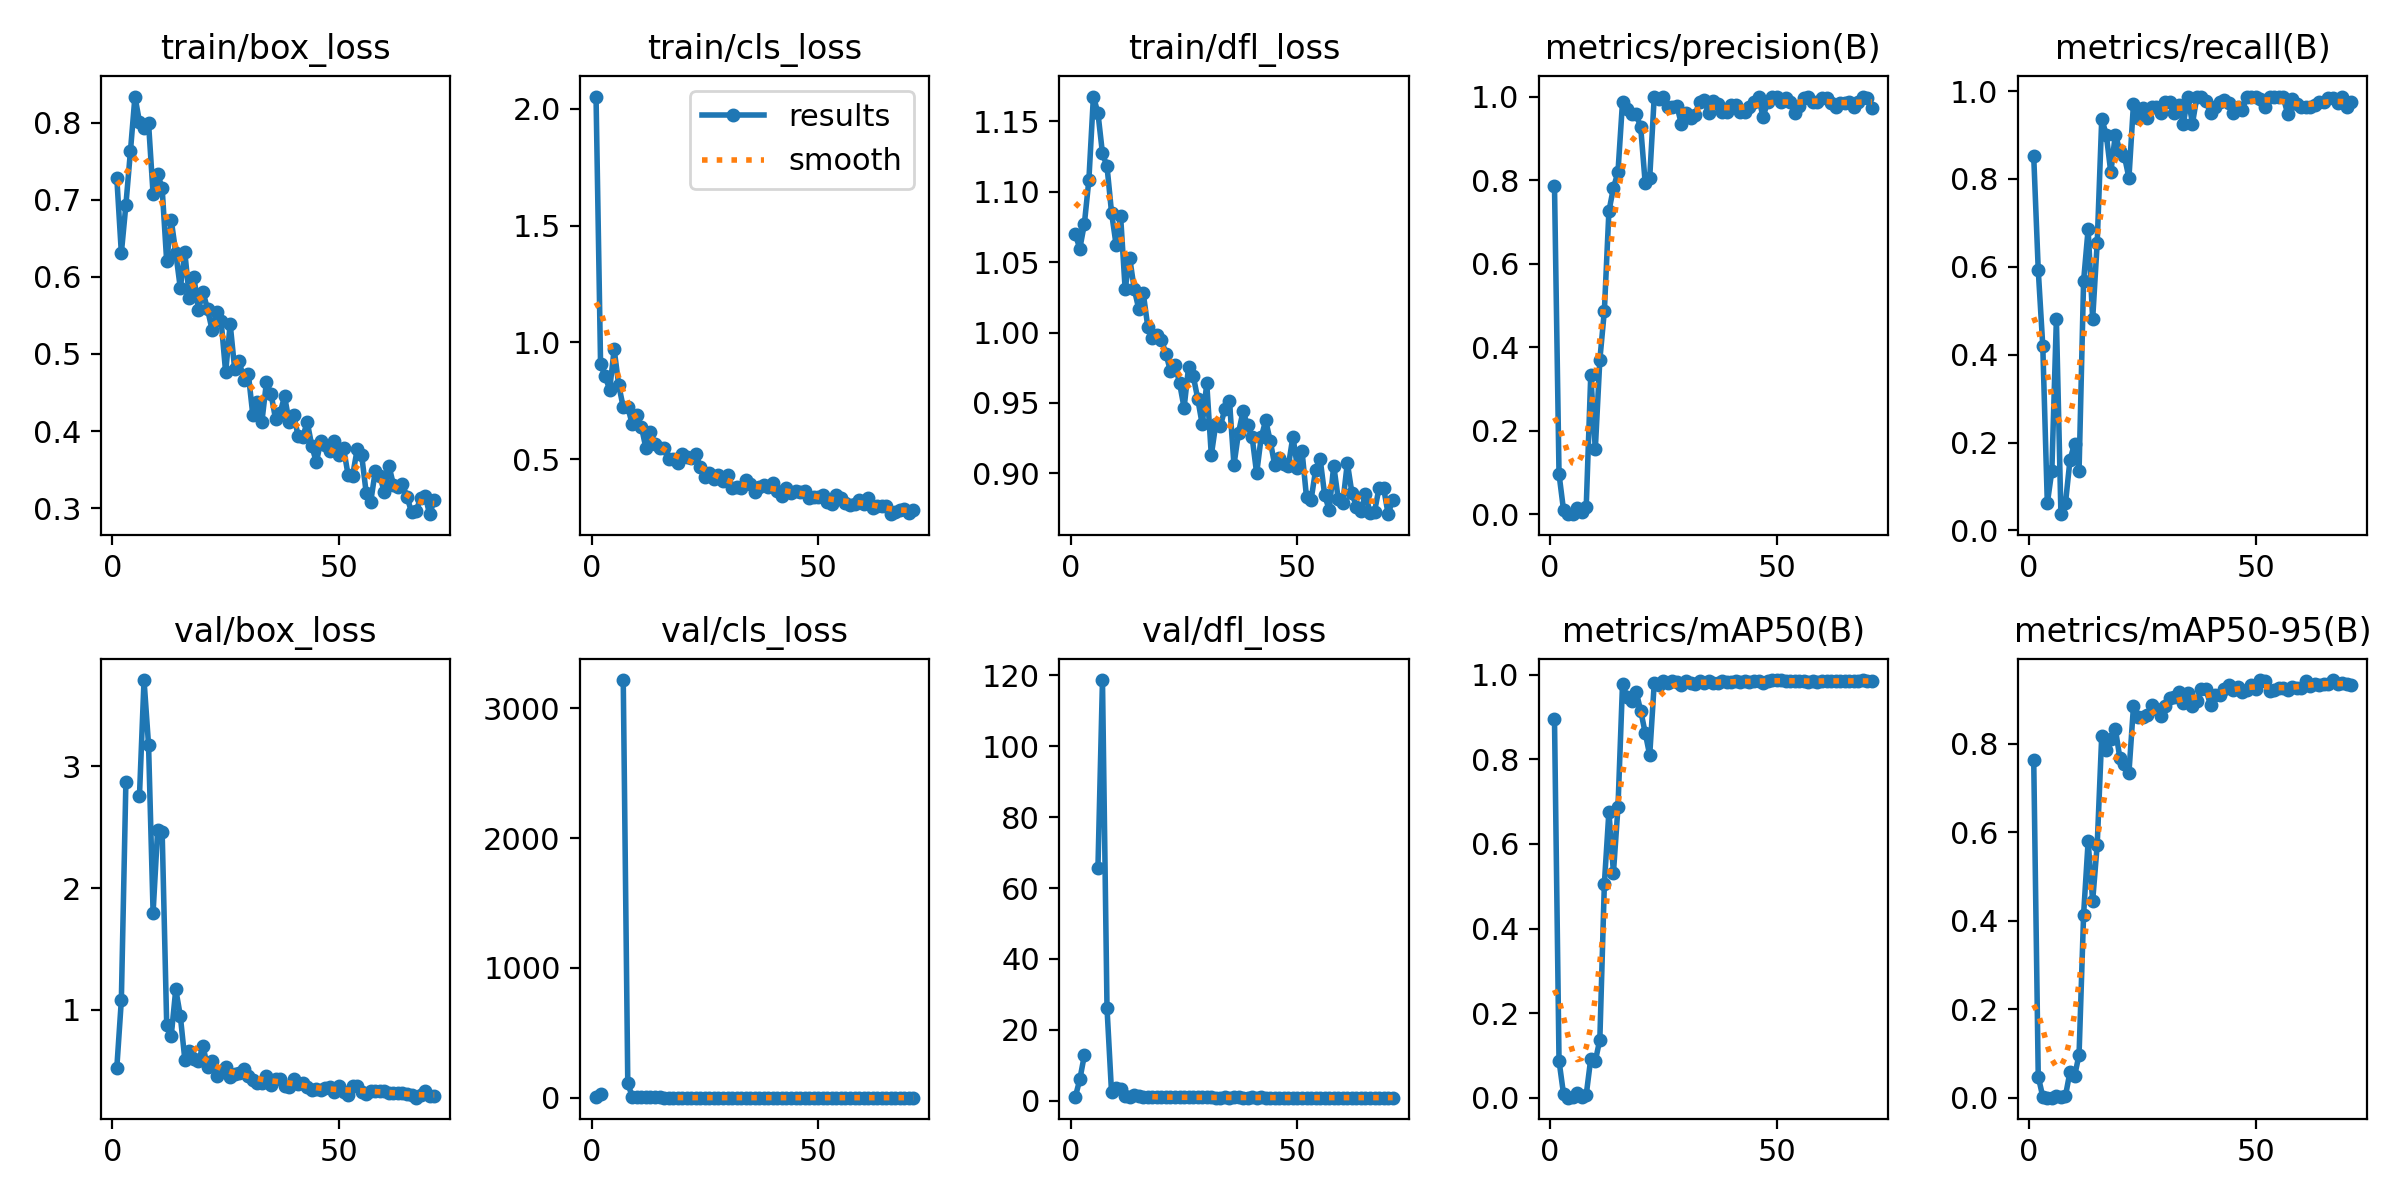


 Confusion Matrix:


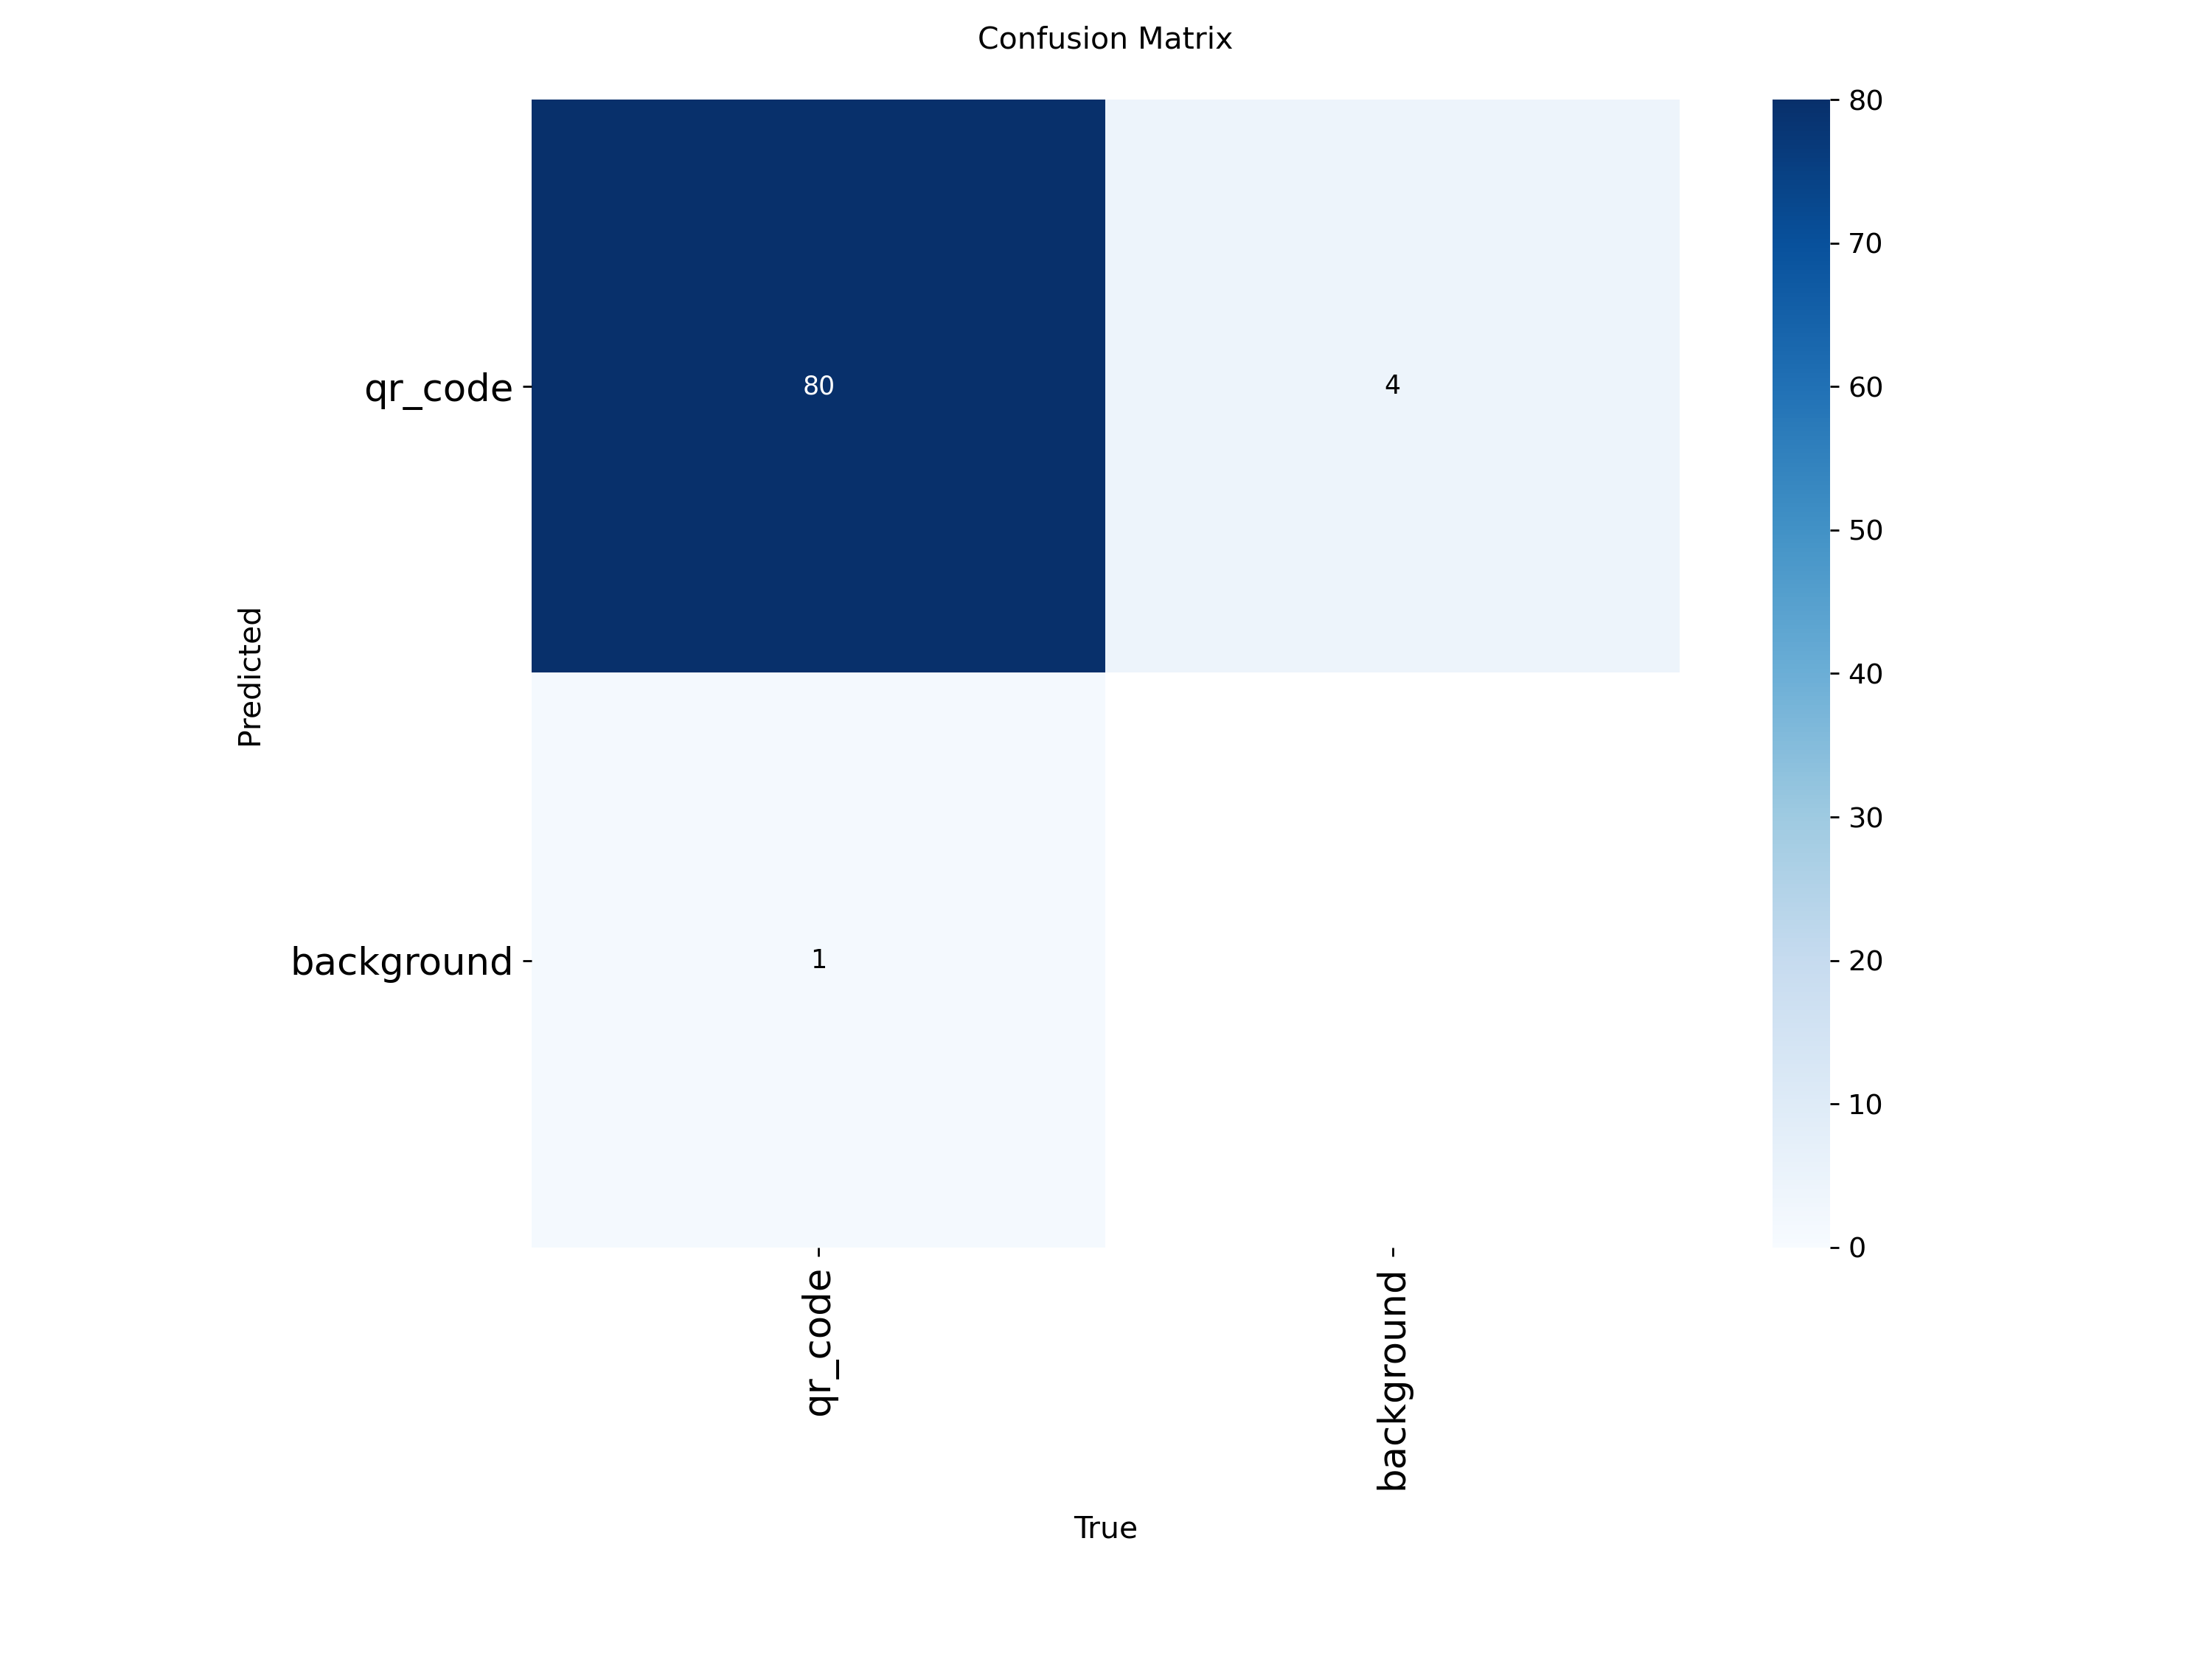


 Validation Predictions:


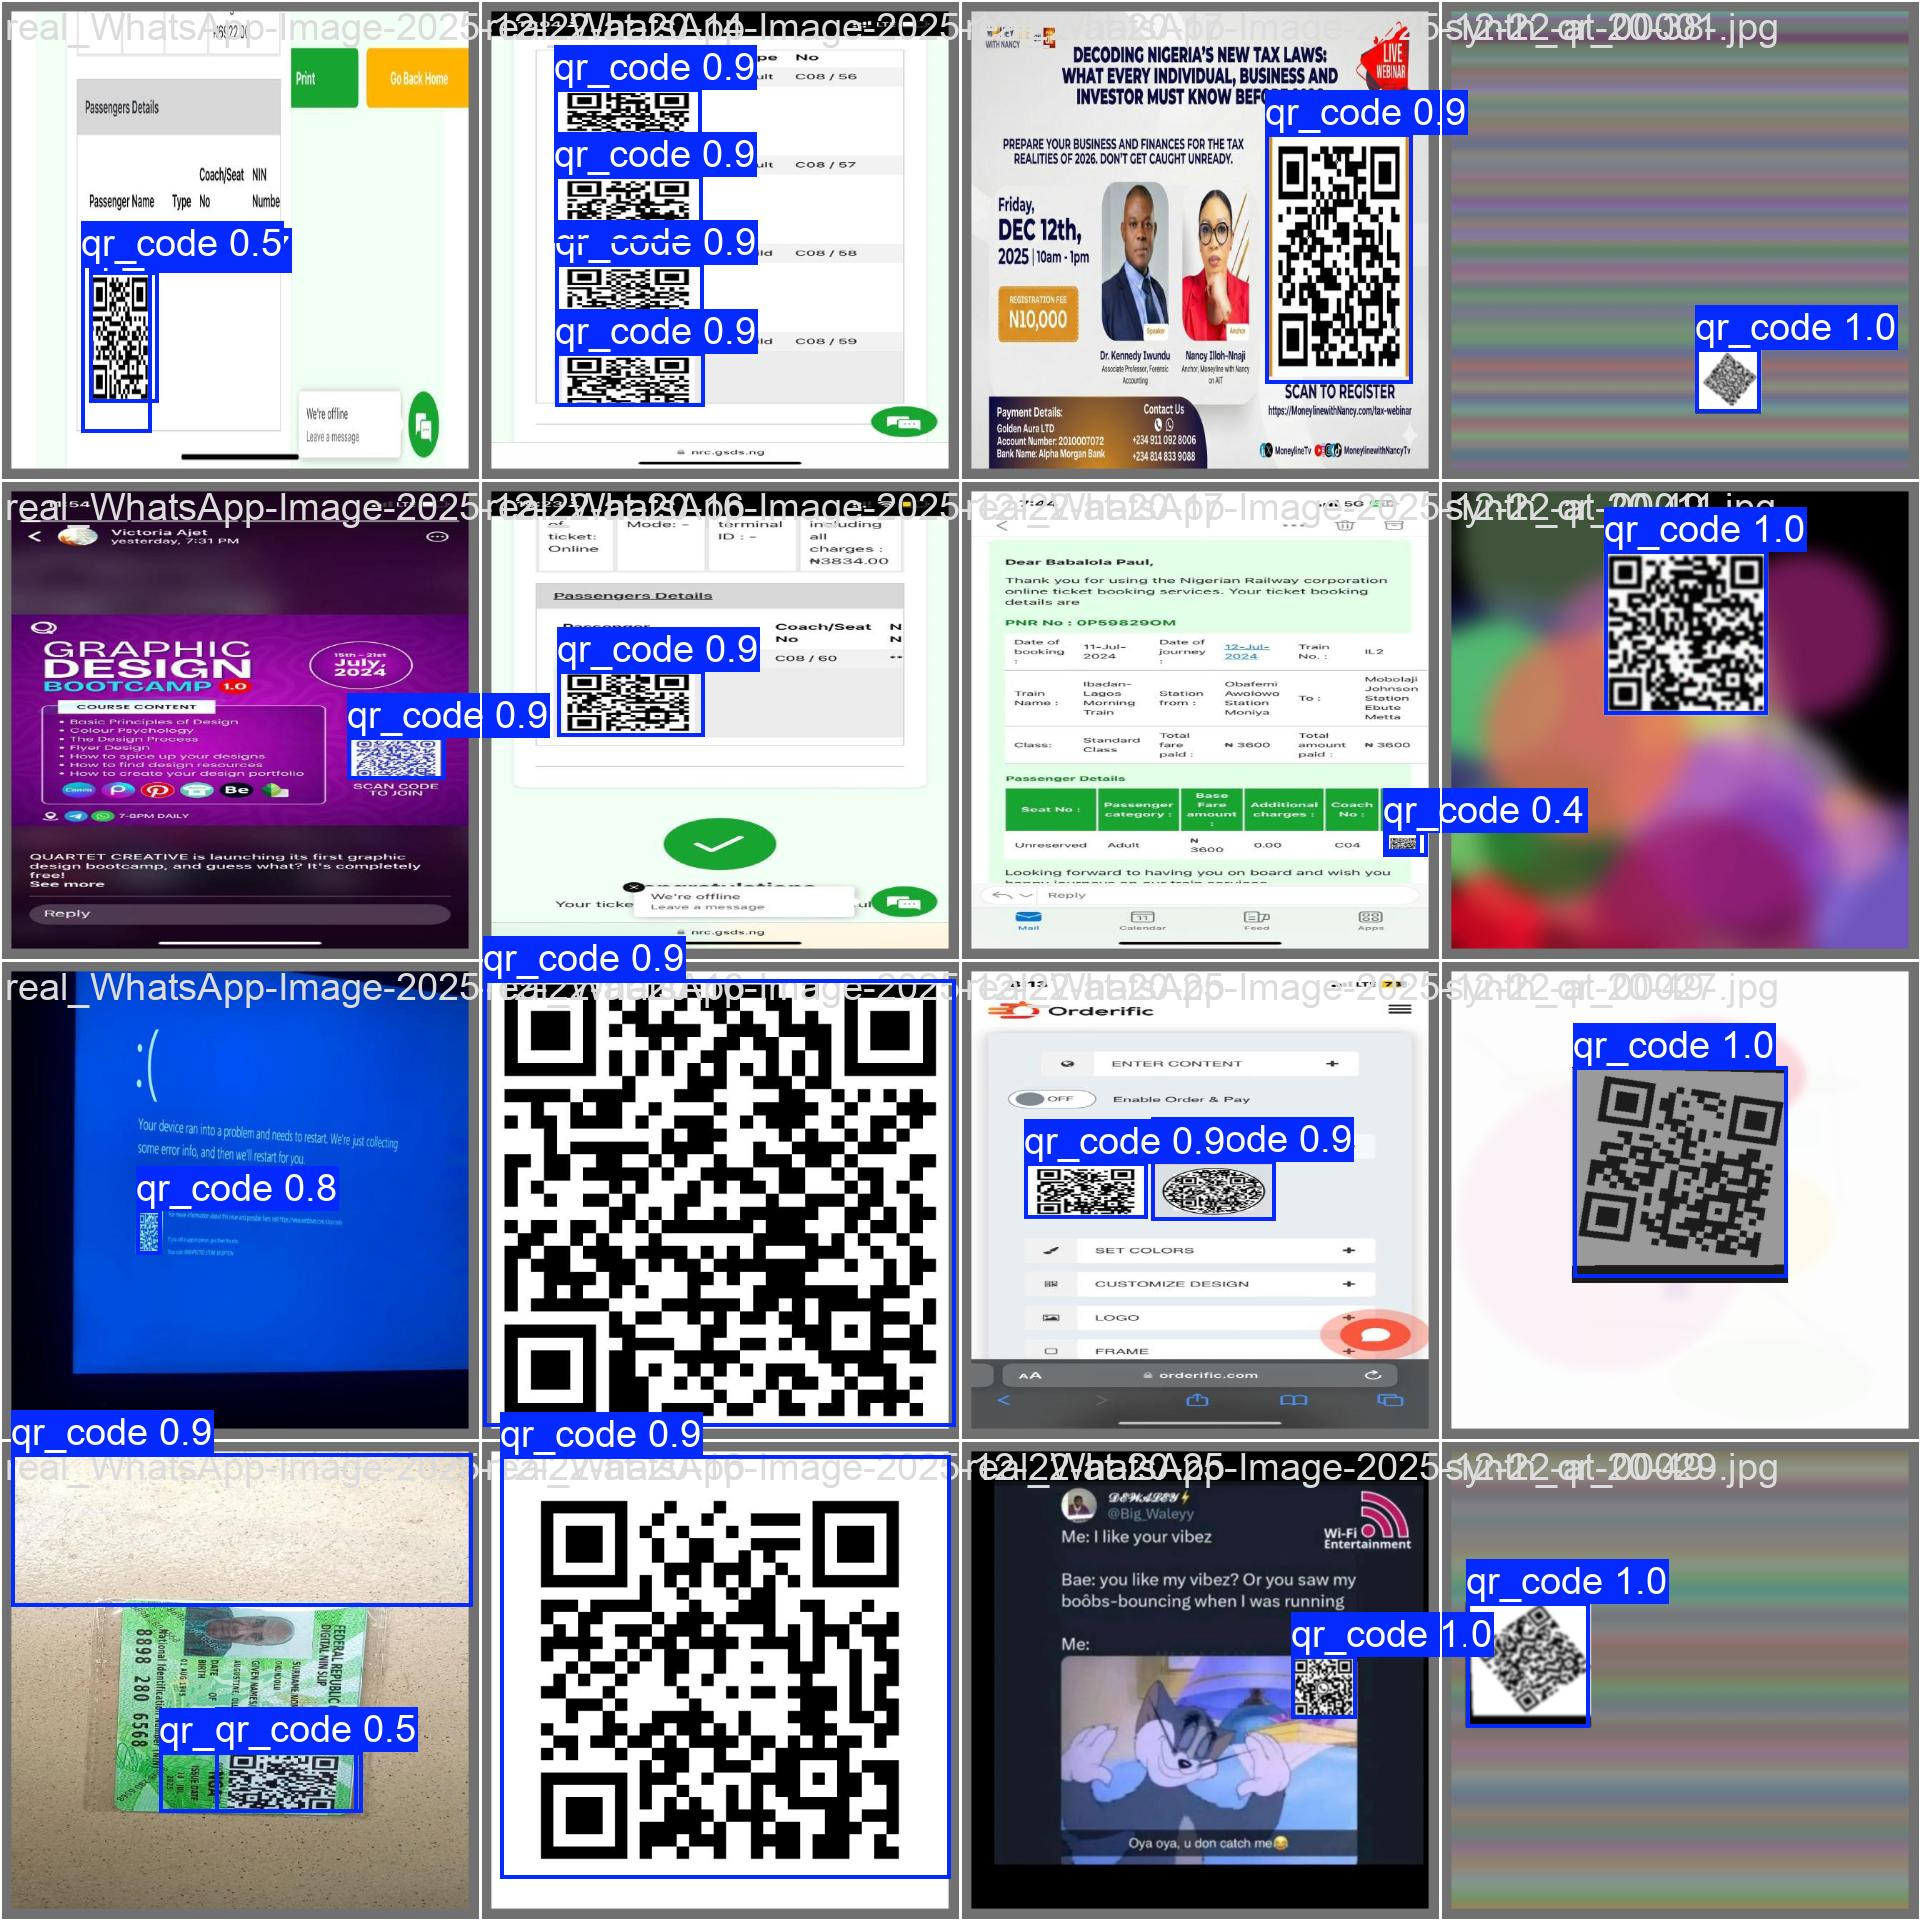

In [16]:
from IPython.display import Image, display

print(" Training Curves:")
display(Image('/content/runs/detect/train/results.png'))

print("\n Confusion Matrix:")
display(Image('/content/runs/detect/train/confusion_matrix.png'))

print("\n Validation Predictions:")
display(Image('/content/runs/detect/train/val_batch0_pred.jpg'))

In [1]:
from google.colab import files
import zipfile

uploaded = files.upload()
zip_name = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_name, 'r') as zf:
    zf.extractall('/content/')

Saving data_expanded.zip to data_expanded.zip


In [4]:
import yaml
import os

# Update this path to where you uploaded data_expanded in Drive
dataset_path = '/content/data_expanded'

# Check if dataset exists
if os.path.exists(dataset_path):
    print(f" Dataset found at: {dataset_path}")

    # Count files
    train_imgs = len(os.listdir(f'{dataset_path}/images/train'))
    val_imgs = len(os.listdir(f'{dataset_path}/images/valid'))

    print(f"\n Dataset Statistics:")
    print(f"   Training images: {train_imgs}")
    print(f"   Validation images: {val_imgs}")

    # Check data.yaml
    with open(f'{dataset_path}/data.yaml', 'r') as f:
        config = yaml.safe_load(f)

    # Update path in data.yaml to absolute path
    config['path'] = dataset_path

    # Save updated yaml
    with open(f'{dataset_path}/data.yaml', 'w') as f:
        yaml.dump(config, f, sort_keys=False)

    print(f"\n data.yaml updated with absolute path")

else:
    print(f" Dataset not found!")
    print(f"   Looking for: {dataset_path}")
    print(f"   Please upload your data_expanded folder to Google Drive")

 Dataset found at: /content/data_expanded

 Dataset Statistics:
   Training images: 399
   Validation images: 62

 data.yaml updated with absolute path


In [11]:
from ultralytics import YOLO
import os

model_path = '/content/qr_detector_advanced.pt'

if os.path.exists(model_path):
    model = YOLO(model_path)
    print(f" Loaded qr_detector_advanced.pt for fine-tuning")
else:
    print(f" Model not found at: {model_path}")
    print(" Please upload qr_detector_advanced.pt to Google Drive")
    print("   Location: MyDrive/yolo_models/qr_detector_advanced.pt")

✅ Loaded qr_detector_advanced.pt for fine-tuning


In [13]:
from ultralytics import YOLO
import yaml

# Load data config
dataset_path = '/content/data_expanded'
data_yaml = f'{dataset_path}/data.yaml'

print("="*70)
print(" STARTING FINE-TUNING")
print("="*70)
print(f"Dataset: {dataset_path}")
print(f"Expected time: ~20-25 minutes\\n")

# Fine-tune
results = model.train(
    data=data_yaml,
    epochs=30,              # Fewer epochs for fine-tuning
    imgsz=640,
    batch=16,
    name='qr_expanded_finetuned',
    device=0,               # Use GPU

    # Fine-tuning specific
    freeze=10,              # Freeze first 10 layers
    lr0=0.001,              # Lower learning rate
    lrf=0.0001,
    warmup_epochs=2,
    patience=10,

    # Augmentation
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10,
    translate=0.1,
    scale=0.5,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.0,

    # Performance
    save=True,
    plots=True,
    amp=True,
    cache=True,
    workers=8,
    verbose=True,
)

 STARTING FINE-TUNING
Dataset: /content/data_expanded
Expected time: ~20-25 minutes\n
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data_expanded/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.0001, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/qr_detector_advanced.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=qr_expanded_finetuned2, nbs=64

 TRAINING RESULTS

 Training Metrics:


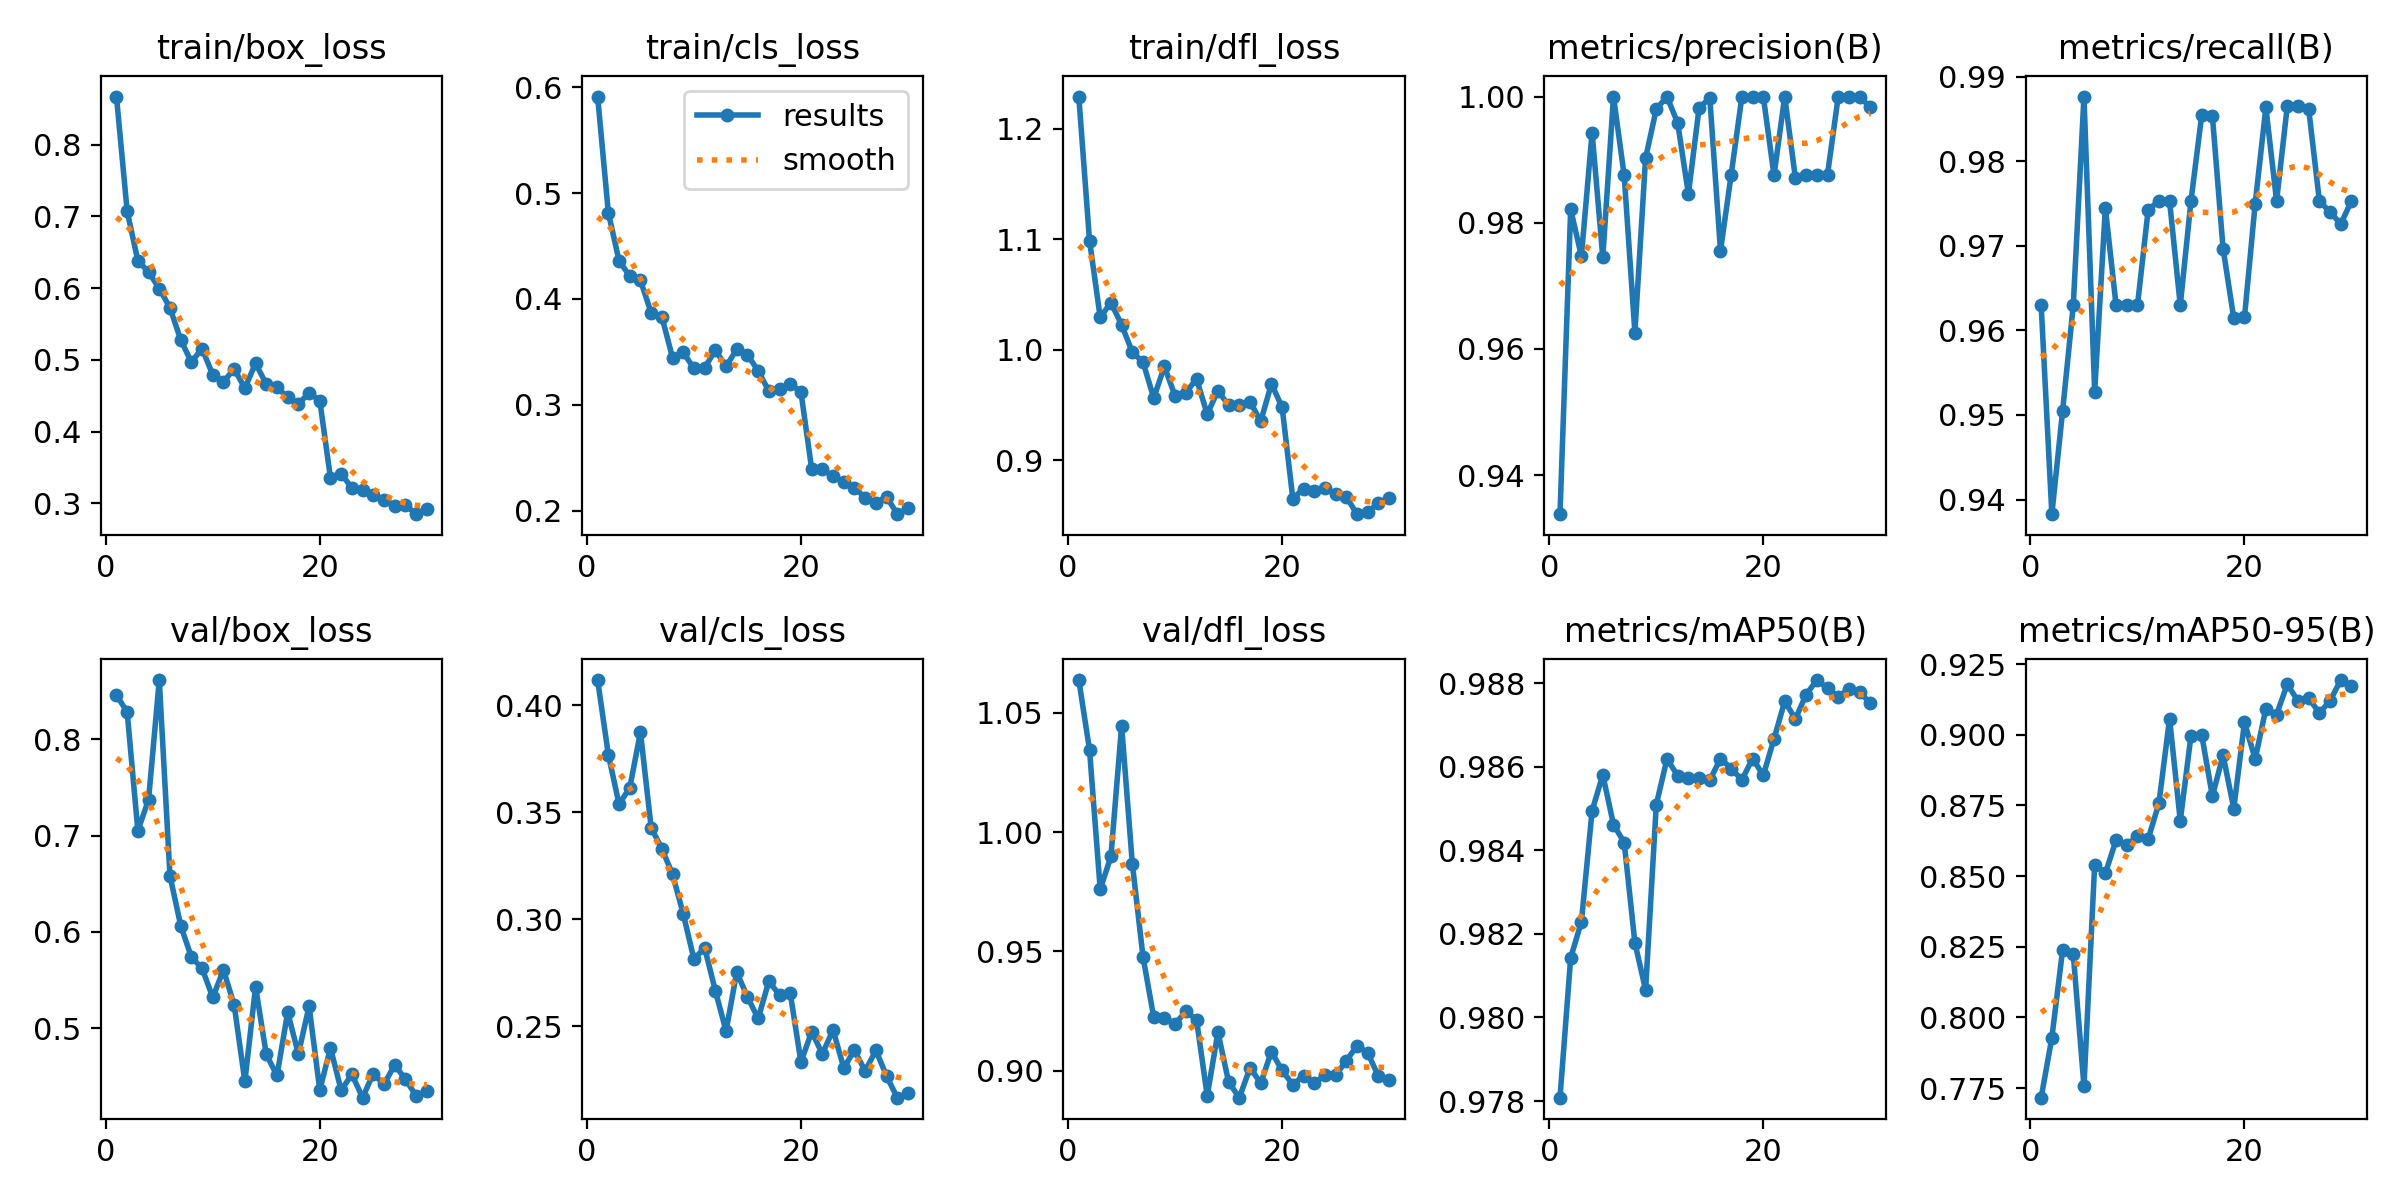


 Confusion Matrix:


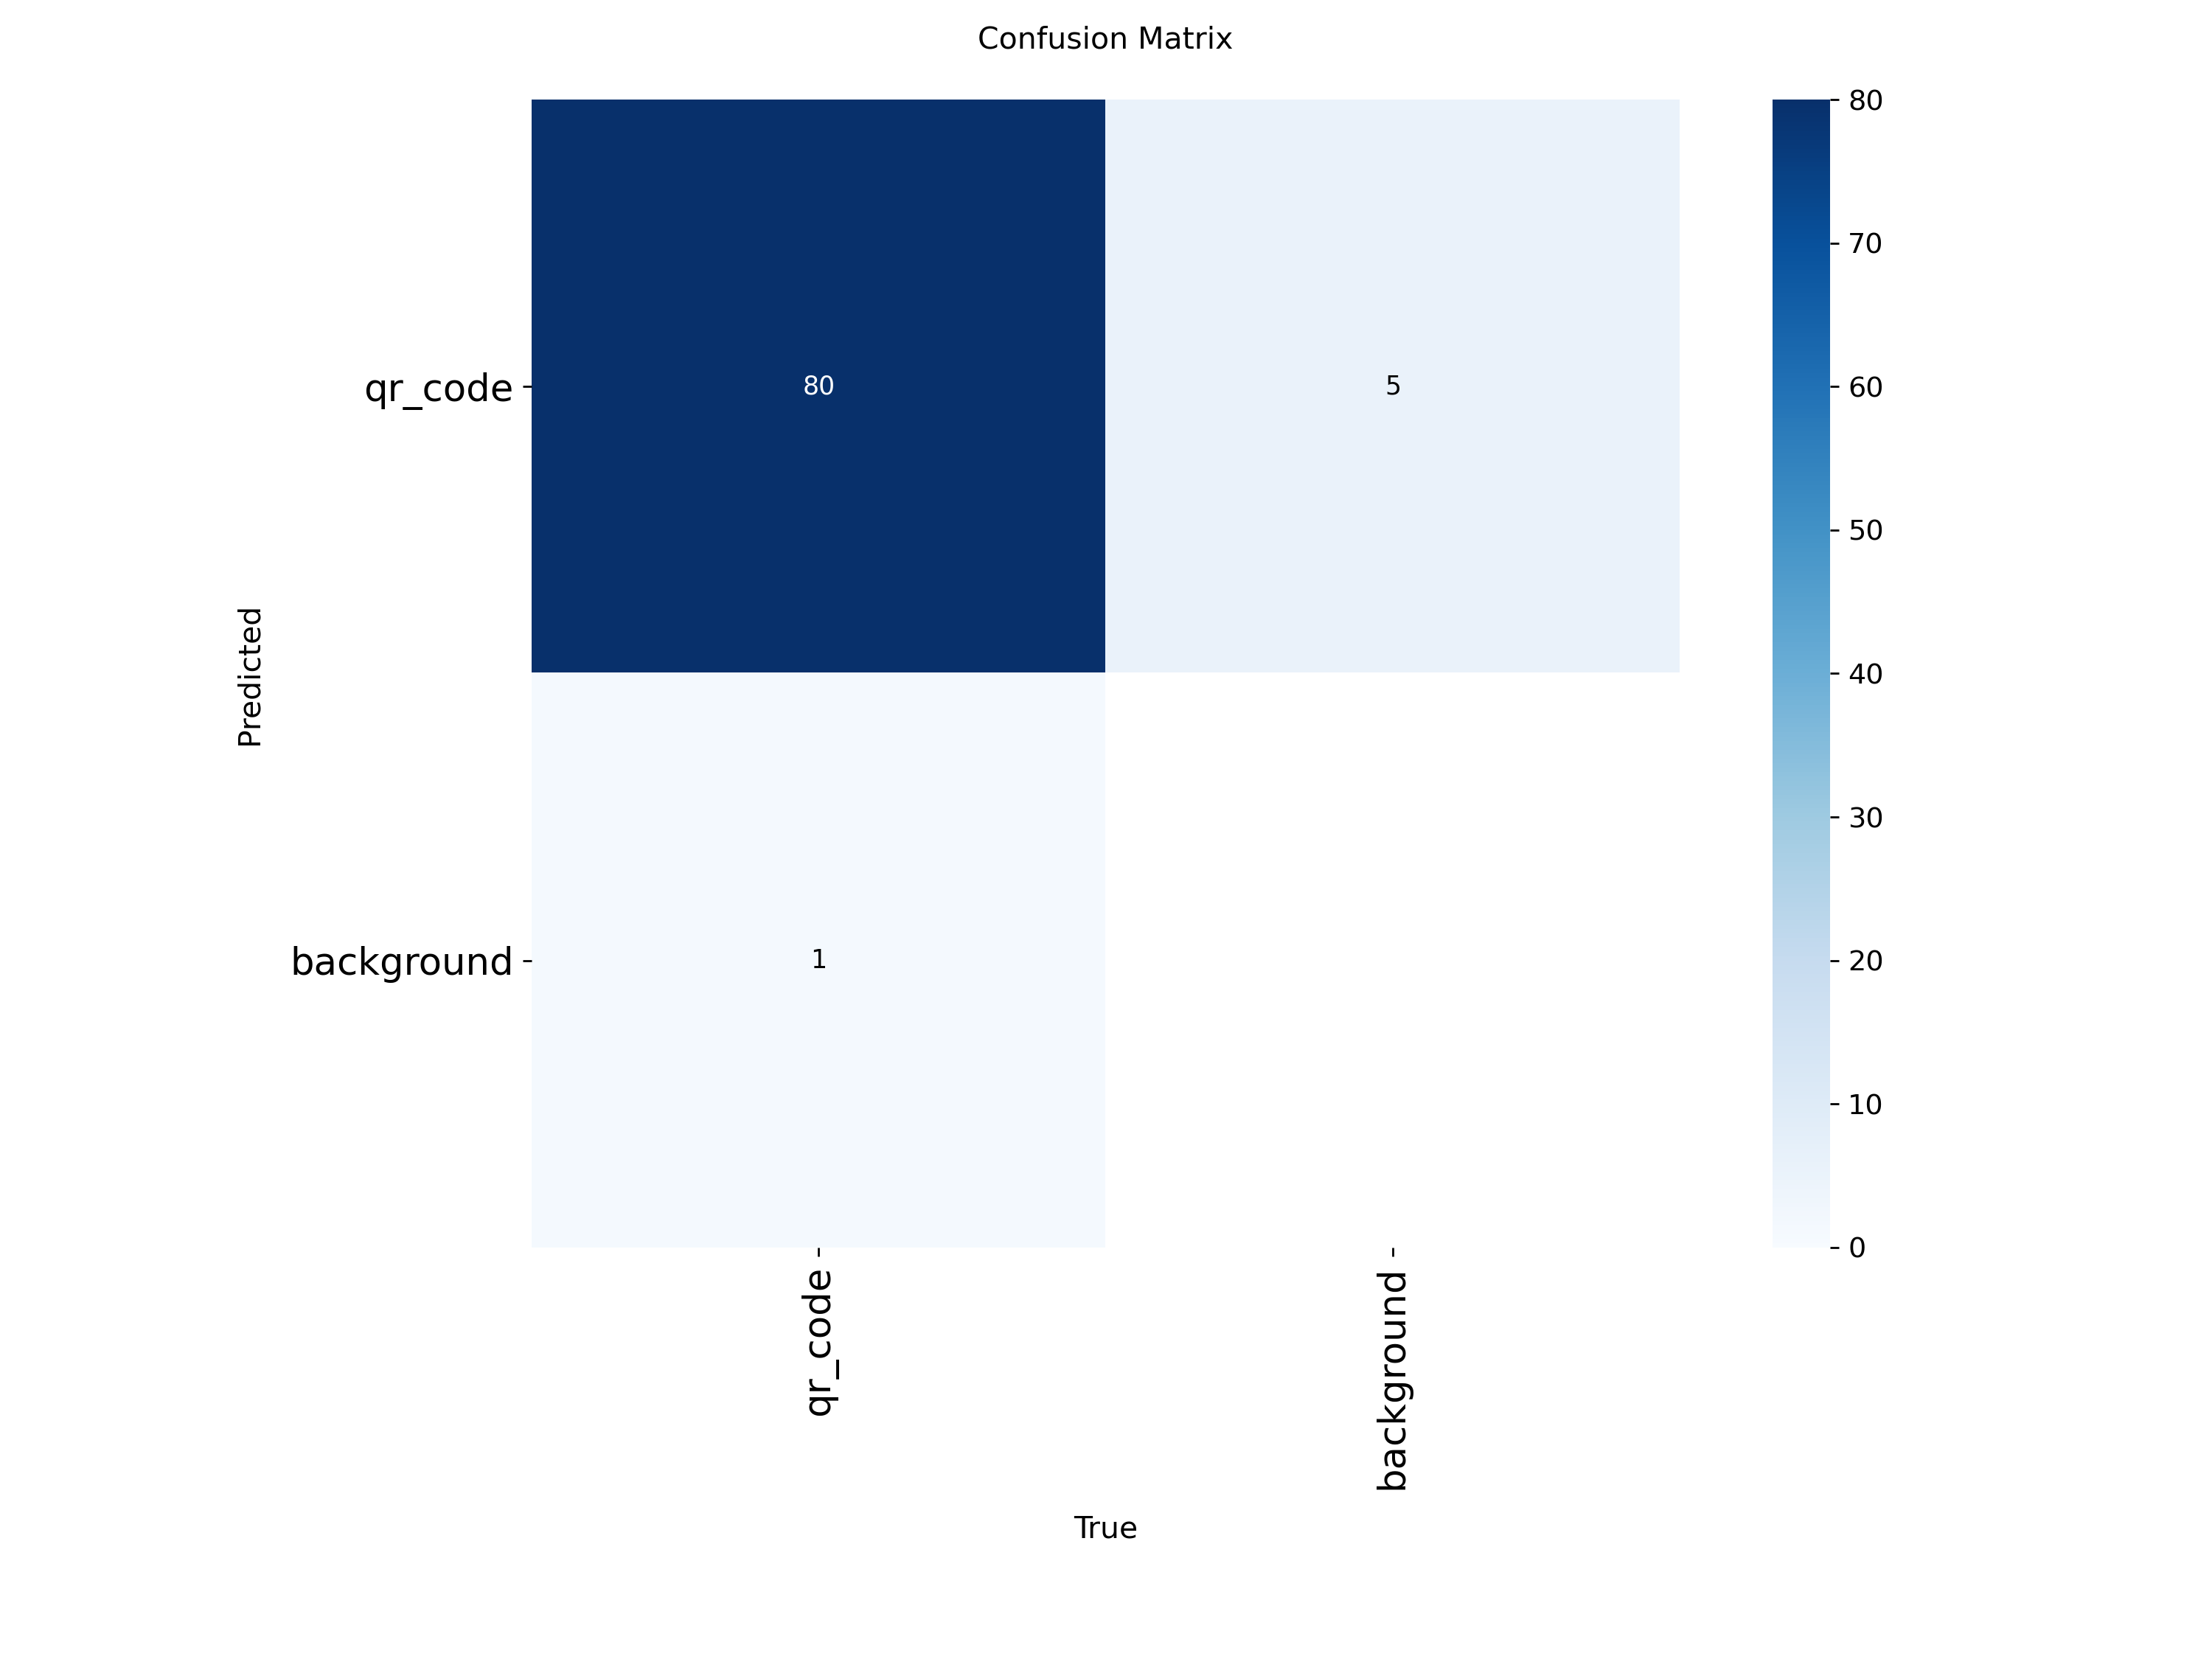

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1353.1±598.5 MB/s, size: 49.8 KB)
val: Scanning /content/data_expanded/labels/valid.cache... 62 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 62/62 82.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.7it/s 2.4s
                   all         62         81          1      0.973      0.988      0.917
Speed: 11.3ms preprocess, 9.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /content/runs/detect/val3
\n Final Metrics:
   mAP50: 0.9878
   mAP50-95: 0.9173
   Precision: 1.0000
   Recall: 0.9726


In [19]:
from IPython.display import Image, display
import os

results_dir = '/content/runs/detect/qr_expanded_finetuned2'

print("="*70)
print(" TRAINING RESULTS")
print("="*70)

# Training curves
if os.path.exists(f'{results_dir}/results.png'):
    print("\n Training Metrics:")
    display(Image(f'{results_dir}/results.png'))

# Confusion matrix
if os.path.exists(f'{results_dir}/confusion_matrix.png'):
    print("\n Confusion Matrix:")
    display(Image(f'{results_dir}/confusion_matrix.png'))

# Validation metrics
best_model = YOLO(f'{results_dir}/weights/best.pt')
metrics = best_model.val()

print(f"\\n Final Metrics:")
print(f"   mAP50: {metrics.box.map50:.4f}")
print(f"   mAP50-95: {metrics.box.map:.4f}")
print(f"   Precision: {metrics.box.mp:.4f}")
print(f"   Recall: {metrics.box.mr:.4f}")

In [20]:
from google.colab import files

files.download('/content/runs/detect/qr_expanded_finetuned2/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>